In [50]:
%matplotlib inline
import quantstats as qs
from pathlib import Path

days_per_year = 365
output = Path("/output")
qs.extend_pandas()
btc = qs.utils.download_returns("BTC-USD")

In [56]:
btc

Date
2014-09-17         NaN
2014-09-18   -0.071926
2014-09-19   -0.069843
2014-09-20    0.035735
2014-09-21   -0.024659
                ...   
2022-01-20   -0.025486
2022-01-21   -0.103812
2022-01-22   -0.039143
2022-01-23    0.035585
2022-01-25   -0.003243
Name: Close, Length: 2687, dtype: float64

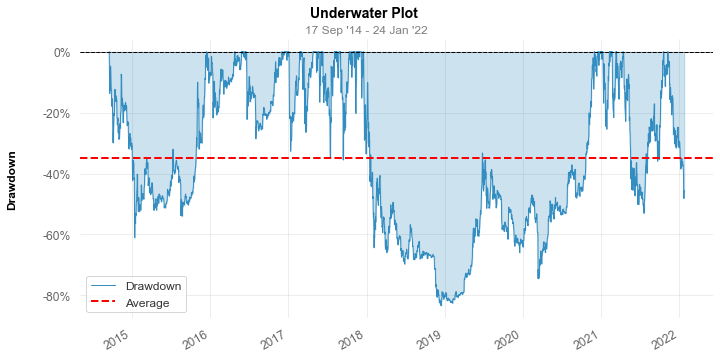

In [3]:
btc.plot_drawdown()

In [21]:
start=btc.index[0].strftime('%Y-%m-%d')
end = btc.index[-1].strftime('%Y-%m-%d')
title = f"Bitcoin ({start}) - ({end})"

                           Strategy
-------------------------  ----------
Start Period               2014-09-17
End Period                 2022-01-25
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          7,806.51%
CAGR﹪                     81.06%

Sharpe                     1.17
Smart Sharpe               1.15
Sortino                    1.73
Smart Sortino              1.69
Sortino/√2                 1.22
Smart Sortino/√2           1.2
Omega                      1.21

Max Drawdown               -83.4%
Longest DD Days            1079
Volatility (ann.)          74.28%
Calmar                     0.97
Skew                       -0.16
Kurtosis                   7.32

Expected Daily %           0.16%
Expected Monthly %         5.03%
Expected Yearly %          62.51%
Kelly Criterion            9.23%
Risk of Ruin               0.0%
Daily Value-at-Risk        -6.16%
Expected Shortfall (cVaR)  -6.16%

Gain/Pain Ratio            0.21
Gain/Pain (1M)          

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2017-12-17,2018-12-15,2020-11-30,1079,-83.399009,-82.233460
2,2014-09-18,2015-01-14,2015-12-15,453,-61.056254,-53.973466
3,2021-04-14,2021-07-20,2021-10-19,188,-53.061850,-50.519955
4,2021-11-09,2022-01-22,2022-01-25,77,-48.154663,-46.483880
5,2017-09-02,2017-09-14,2017-10-12,40,-35.508102,-26.760574


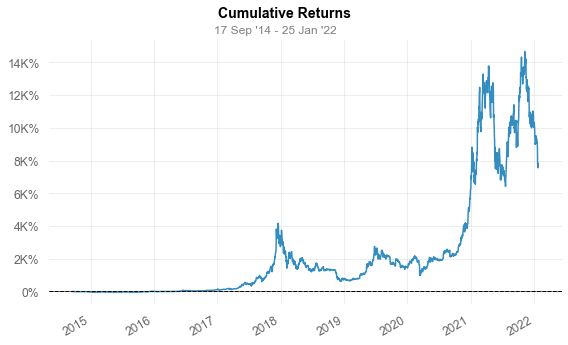

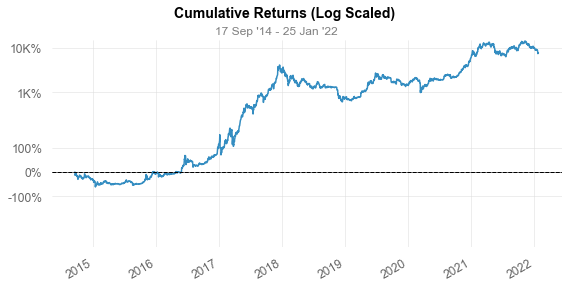

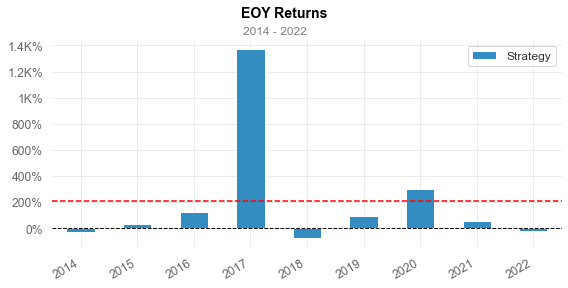

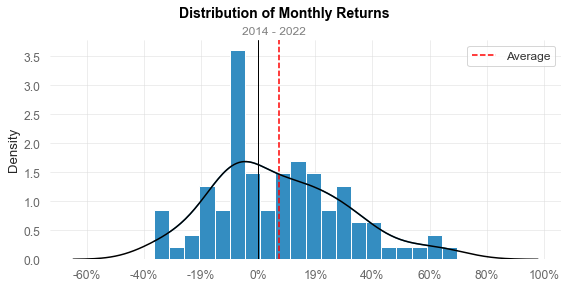

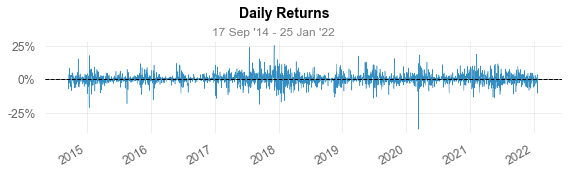

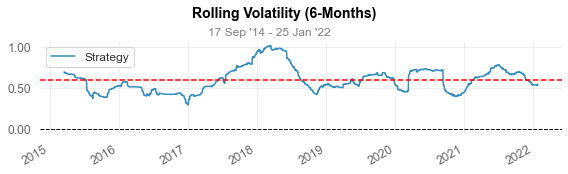

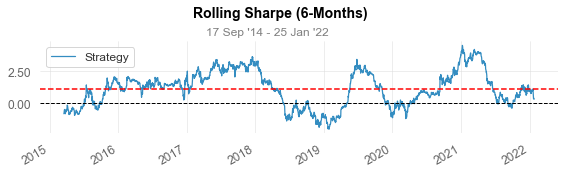

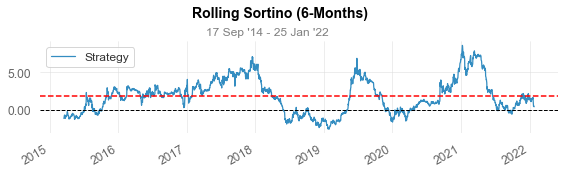

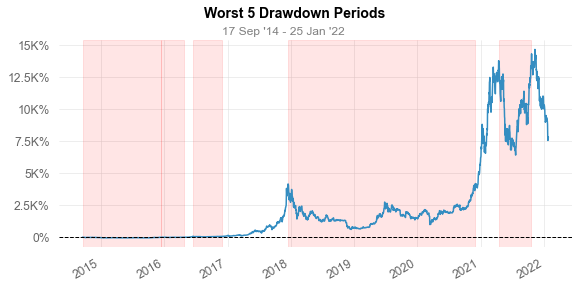

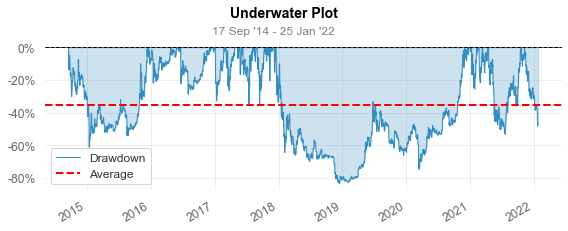

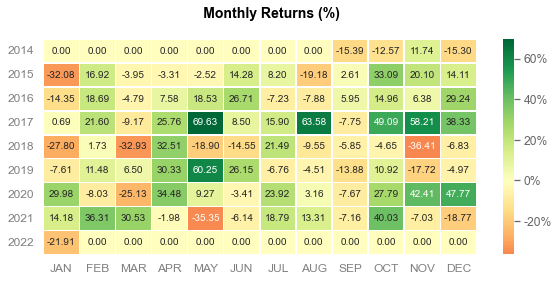

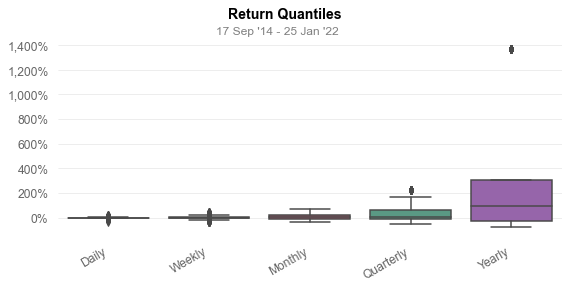

In [58]:
download_filename = f"BTC_tearsheet {start}--{end}.html"
qs.reports.html(btc, title=title, download_filename=download_filename, periods_per_year=days_per_year)
qs.reports.full(btc, periods_per_year=days_per_year)



In [15]:
dd = qs.stats.to_drawdown_series(btc)
dd_info = qs.stats.drawdown_details(dd).sort_values(
    by='max drawdown', ascending=True)[:50]

In [16]:
dd_info.to_csv("btc-drawdowns.csv")

In [30]:
dd_info

,start,valley,end,days,max drawdown,99% max drawdown
40,2017-12-17,2018-12-15,2020-11-30,1079,-83.399009,-82.233460
0,2014-09-18,2015-01-14,2015-12-15,453,-61.056254,-53.973466
53,2021-04-14,2021-07-20,2021-10-19,188,-53.061850,-50.519955
55,2021-11-09,2022-01-22,2022-01-24,76,-48.154663,-46.309741
29,2017-09-02,2017-09-14,2017-10-12,40,-35.508102,-26.760574
22,2017-06-12,2017-07-16,2017-08-05,54,-34.761727,-32.427803
13,2017-01-05,2017-01-11,2017-02-23,49,-32.645984,-30.301110
7,2016-06-17,2016-08-02,2016-12-02,168,-28.558094,-25.977544
15,2017-03-04,2017-03-24,2017-04-26,53,-26.468441,-24.177838
45,2021-01-09,2021-01-27,2021-02-08,30,-25.406054,-24.442388


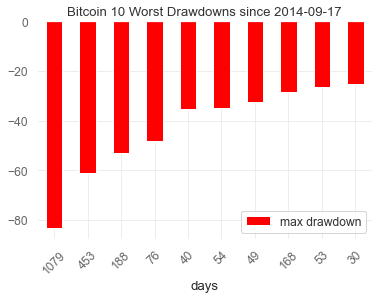

In [39]:
dd_info[:10].plot.bar(x="days", y="max drawdown", rot = 45, color="red", title=f"Bitcoin 10 Worst Drawdowns since {start}")